In [32]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### Loading the dataset

In [2]:
df = pd.read_csv('cleaned_dataset.csv')
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Administrative_Proportion,Informational_Proportion,ProductRelated_Proportion
0,0,0.0,0,0.0,1,1.000000,0.200000,0.200000,0.0,0.0,...,1,1,0,0,0,0,1,0.0,0.0,1.0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,...,1,2,0,0,0,0,1,0.0,0.0,1.0
2,0,0.0,0,0.0,1,1.000000,0.200000,0.200000,0.0,0.0,...,9,3,0,0,0,0,1,0.0,0.0,1.0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,...,2,4,0,0,0,0,1,0.0,0.0,1.0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,...,1,4,1,0,0,0,1,0.0,0.0,1.0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,...,1,3,0,0,0,0,1,0.0,0.0,1.0
6,0,0.0,0,0.0,1,1.000000,0.200000,0.200000,0.0,0.4,...,3,3,0,0,0,0,1,0.0,0.0,1.0
7,1,1.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,...,1,5,1,0,0,0,1,1.0,0.0,0.0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,...,2,3,0,0,0,0,1,0.0,0.0,1.0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,...,1,2,0,0,0,0,1,0.0,0.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12199 entries, 0 to 12198
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12199 non-null  int64  
 1   Administrative_Duration        12199 non-null  float64
 2   Informational                  12199 non-null  int64  
 3   Informational_Duration         12199 non-null  float64
 4   ProductRelated                 12199 non-null  int64  
 5   ProductRelated_Duration        12199 non-null  float64
 6   BounceRates                    12199 non-null  float64
 7   ExitRates                      12199 non-null  float64
 8   PageValues                     12199 non-null  float64
 9   SpecialDay                     12199 non-null  float64
 10  Month                          12199 non-null  int64  
 11  OperatingSystems               12199 non-null  int64  
 12  Browser                        12199 non-null 

In [4]:
# i'm not really sure what to do about the three columns for each type of page yet,
# maybe i'll just keep them for now

X = pd.concat([df.loc[:,'Administrative':'Weekend'], df.loc[:,'VisitorType_New_Visitor':'ProductRelated_Proportion']], axis=1)
y = df.loc[:,'Revenue']

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12199 entries, 0 to 12198
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12199 non-null  int64  
 1   Administrative_Duration        12199 non-null  float64
 2   Informational                  12199 non-null  int64  
 3   Informational_Duration         12199 non-null  float64
 4   ProductRelated                 12199 non-null  int64  
 5   ProductRelated_Duration        12199 non-null  float64
 6   BounceRates                    12199 non-null  float64
 7   ExitRates                      12199 non-null  float64
 8   PageValues                     12199 non-null  float64
 9   SpecialDay                     12199 non-null  float64
 10  Month                          12199 non-null  int64  
 11  OperatingSystems               12199 non-null  int64  
 12  Browser                        12199 non-null 

In [5]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 12199 entries, 0 to 12198
Series name: Revenue
Non-Null Count  Dtype
--------------  -----
12199 non-null  int64
dtypes: int64(1)
memory usage: 95.4 KB


### Splitting the data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9149 entries, 3030 to 2137
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 9149 non-null   int64  
 1   Administrative_Duration        9149 non-null   float64
 2   Informational                  9149 non-null   int64  
 3   Informational_Duration         9149 non-null   float64
 4   ProductRelated                 9149 non-null   int64  
 5   ProductRelated_Duration        9149 non-null   float64
 6   BounceRates                    9149 non-null   float64
 7   ExitRates                      9149 non-null   float64
 8   PageValues                     9149 non-null   float64
 9   SpecialDay                     9149 non-null   float64
 10  Month                          9149 non-null   int64  
 11  OperatingSystems               9149 non-null   int64  
 12  Browser                        9149 non-null 

In [8]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 9149 entries, 3030 to 2137
Series name: Revenue
Non-Null Count  Dtype
--------------  -----
9149 non-null   int64
dtypes: int64(1)
memory usage: 143.0 KB


### Oversampling the training set using SMOTE

In [9]:
over = SMOTE(random_state=36)
X_o, y_o = over.fit_resample(X_train, y_train)

In [10]:
X_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15430 entries, 0 to 15429
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 15430 non-null  int64  
 1   Administrative_Duration        15430 non-null  float64
 2   Informational                  15430 non-null  int64  
 3   Informational_Duration         15430 non-null  float64
 4   ProductRelated                 15430 non-null  int64  
 5   ProductRelated_Duration        15430 non-null  float64
 6   BounceRates                    15430 non-null  float64
 7   ExitRates                      15430 non-null  float64
 8   PageValues                     15430 non-null  float64
 9   SpecialDay                     15430 non-null  float64
 10  Month                          15430 non-null  int64  
 11  OperatingSystems               15430 non-null  int64  
 12  Browser                        15430 non-null 

In [11]:
y_o.info()

<class 'pandas.core.series.Series'>
RangeIndex: 15430 entries, 0 to 15429
Series name: Revenue
Non-Null Count  Dtype
--------------  -----
15430 non-null  int64
dtypes: int64(1)
memory usage: 120.7 KB


In [12]:
y_o.value_counts()

0    7715
1    7715
Name: Revenue, dtype: int64

### Modeling
I think we can still use other metrics (precision, recall, f1) to evaluate the models

In [17]:
def fit_and_score(model,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [18]:
def gen_confusion_matrix(model):
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    
    disp.plot()
    plt.show()

#### Gaussian Naive Bayes

In [19]:
GNB_model = GaussianNB()
fit_and_score(GNB_model)

0.8272131147540983

In [21]:
GNB_model_o = GaussianNB()
fit_and_score(GNB_model_o,X_train=X_o,y_train=y_o)

0.7777049180327869

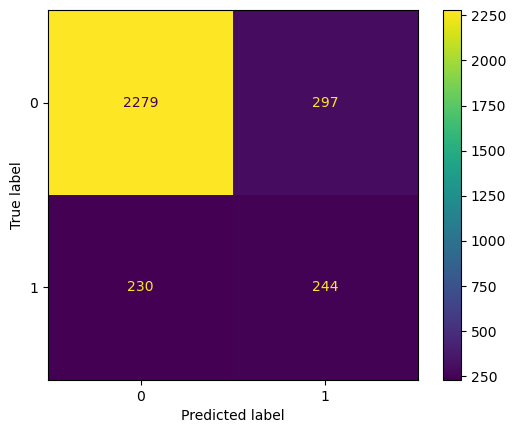

In [20]:
gen_confusion_matrix(GNB_model)

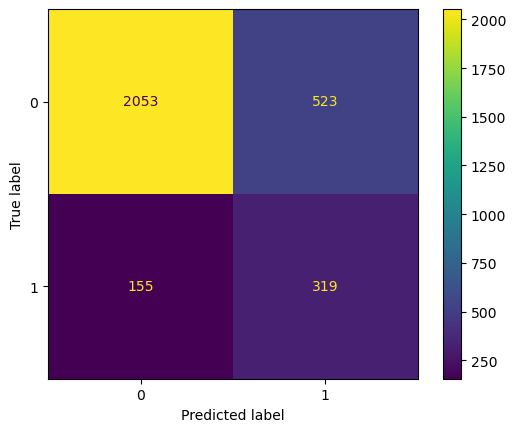

In [22]:
gen_confusion_matrix(GNB_model_o)

#### Logistic Regression

In [23]:
logreg = LogisticRegression(random_state=36)
fit_and_score(logreg)

C:\Users\neilb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8786885245901639

In [25]:
logreg_o = LogisticRegression(random_state=36)
fit_and_score(logreg_o,X_train=X_o,y_train=y_o)

C:\Users\neilb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8721311475409836

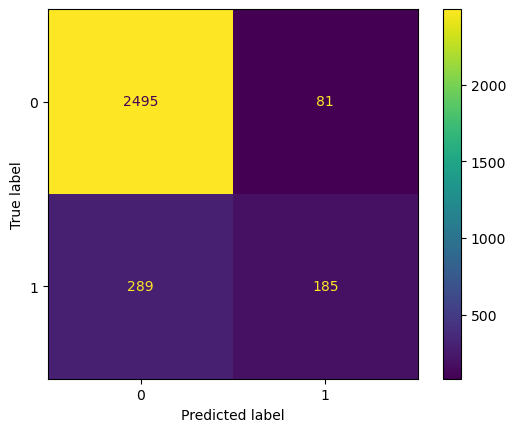

In [24]:
gen_confusion_matrix(logreg)

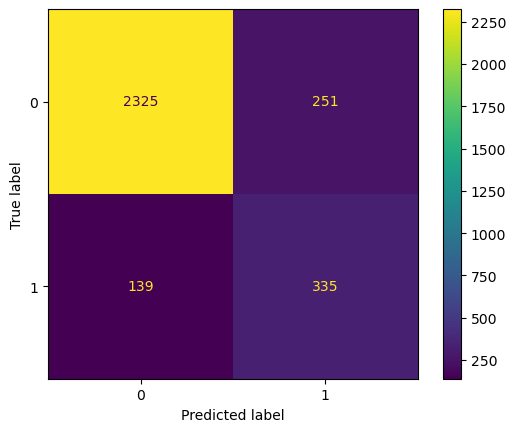

In [26]:
gen_confusion_matrix(logreg_o)

#### Random Forest

In [28]:
rf = RandomForestClassifier(random_state=36)
fit_and_score(rf)

0.8967213114754098

In [30]:
rf_o = RandomForestClassifier(random_state=36)
fit_and_score(rf_o,X_train=X_o,y_train=y_o)

0.8852459016393442

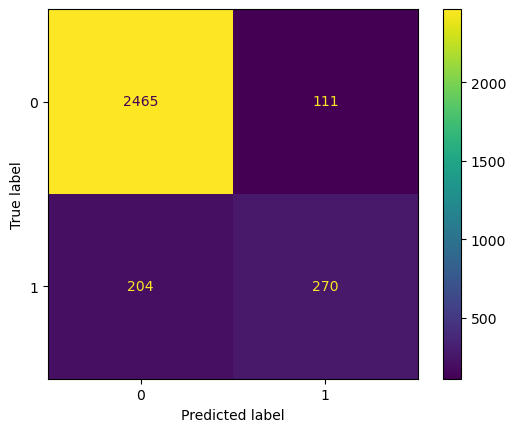

In [29]:
gen_confusion_matrix(rf)

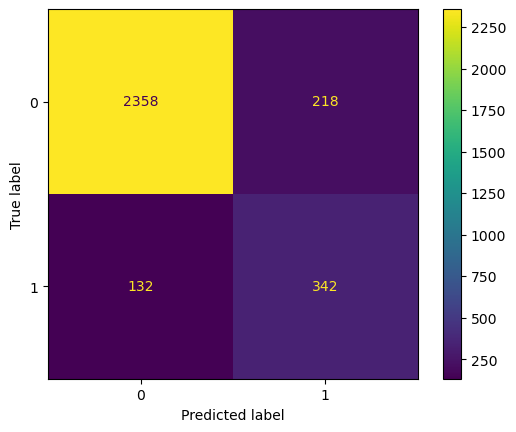

In [31]:
gen_confusion_matrix(rf_o)

#### XGBoost: Boosted Decision Trees

In [33]:
xgb = XGBClassifier(random_state=36)
fit_and_score(xgb)

0.8937704918032787

In [35]:
xgb_o = XGBClassifier(random_state=36)
fit_and_score(xgb_o,X_train=X_o,y_train=y_o)

0.8803278688524591

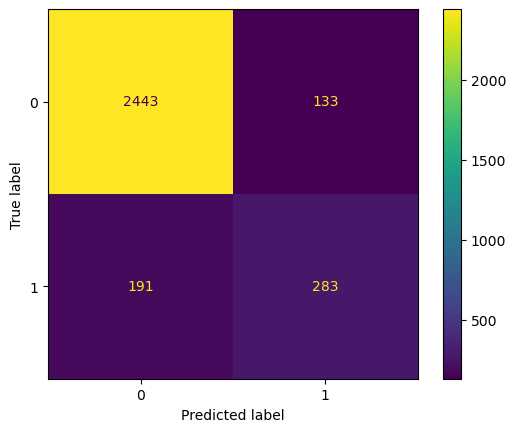

In [34]:
gen_confusion_matrix(xgb)

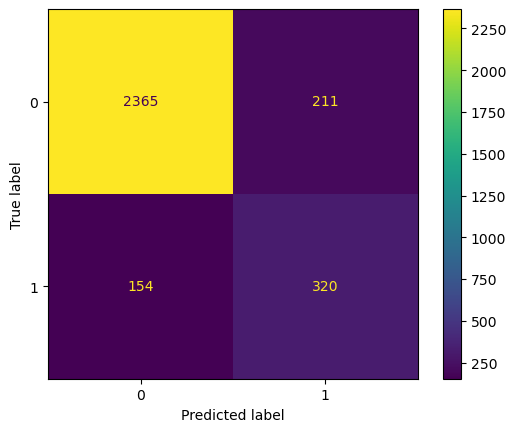

In [37]:
gen_confusion_matrix(xgb_o)